# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

# Import библиотек

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

# Считываем файл в DataFrame



метод .read_csv(path,delimiter)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Illania/Datasets/main/cars_moldova_no_dup_no_outliers.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0
...,...,...,...,...,...,...,...,...,...
32601,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
32602,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
32603,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
32604,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# EDA - Разведывательный анализ данных.

Цель разведывательного анализа данных - попытка предварительного понимания того, с чем вы имеете дело. Например, результатами анализа могут быть удаление аномалий, заполнение (удаление) пропусков, визуализация данных, выделение признаков или получение (или преобразование) новых признаков, удаление некоторых шумов, помех или других нерегулярных значений.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32606 entries, 0 to 32605
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32606 non-null  object 
 1   Model                 32606 non-null  object 
 2   Year                  32606 non-null  int64  
 3   Style                 32606 non-null  object 
 4   Distance              32606 non-null  float64
 5   Engine_capacity(cm3)  32606 non-null  float64
 6   Fuel_type             32606 non-null  object 
 7   Transmission          32606 non-null  object 
 8   Price(euro)           32606 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ MB


посмотрим на то, какие у нас есть категориальные и численные столбцы

In [ ]:
def get_numerical_features(df):
  return list(df.select_dtypes(include=np.number).columns)

def get_categorical_features(df):
  return list(df.select_dtypes(include=[object, 'category']).columns)

print('Категориальные данные:\t ',get_categorical_features(df), '\n Число столблцов = ',len(get_categorical_features(df)))

print('Числовые данные:\t ',  get_numerical_features(df), '\n Число столблцов = ',len(get_numerical_features(df)))


Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'engine_class', 'mileage', 'qcut_km_year', 'mileage_class'] 
 Число столблцов =  8
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Transmission', 'Price(euro)', 'Age', 'km_year', 'is_retro', 'is_japan', 'is_german', 'is_cargo_passenger', 'is_off_road', 'is_mpv', 'is_open_top'] 
 Число столблцов =  14


# 1.  Выполните визуализацию данных с использованием библиотеки Pandas

### Вспомогательные функции

In [ ]:
''' Добавим несколько вспомогательных функций для построения более красивых графиков
'''
def configure_plot(width, height):
  ''' Функция задает визуальные настройки графика
  '''
  fig = plt.figure(figsize=(width,height))
  # Настроим стили графика
  fig.patch.set_facecolor('#d4efdf')
  plt.grid(color = 'white', linewidth = 1)
  plt.locator_params(axis='y', nbins=6)
  # Настроим стили осей
  ax = plt.gca()
  ax.set_facecolor('#a9dfbf')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.tick_params(axis=u'both', which=u'both',length=0)

def configure_legend():
  '''Функция задает визуальные настройки легенды графика.
  '''
  leg = plt.legend()

  # Получим все линии и текстовые лейблы легенды
  leg_lines = leg.get_lines()
  leg_texts = leg.get_texts()

  # настроим размер шрифта и толщины линий для всех объектов легенды
  plt.setp(leg_lines, linewidth=4)
  plt.setp(leg_texts, fontsize='x-large')

### Визуализация №1 - Количество проданных машин по 5 самым популярнам маркам и типу кузова

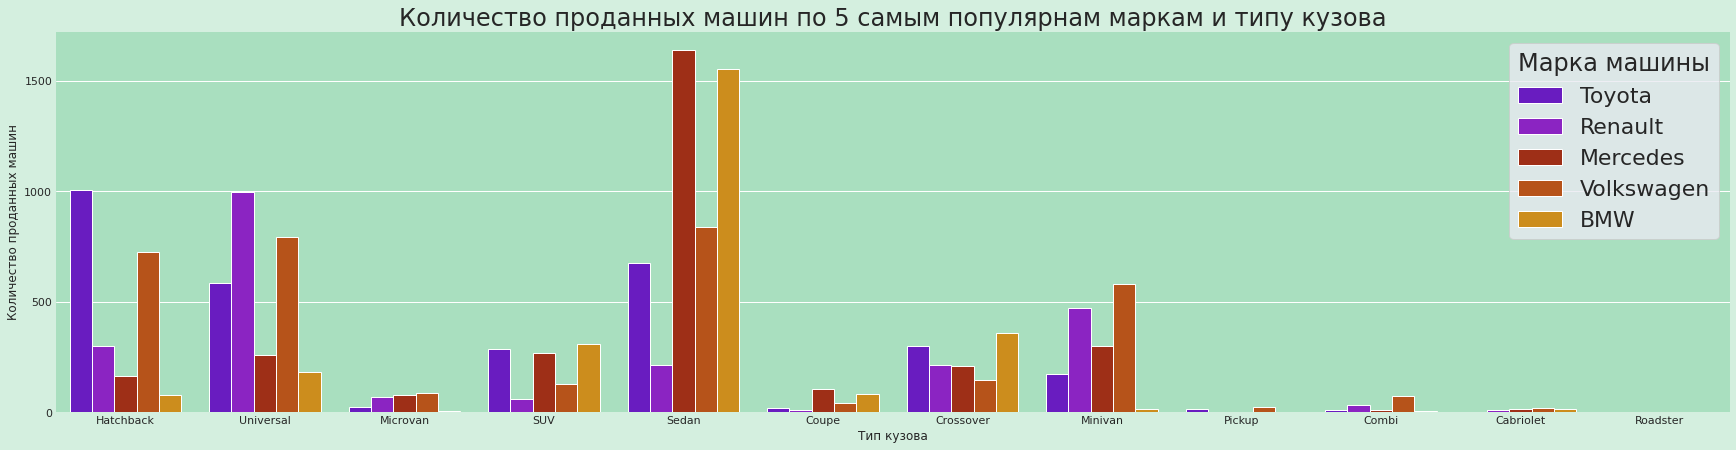

In [ ]:
'''Построим график, показывающий сколько машин, входящих в ТОП5 самых популярнох марок машин было продано в зависимости от типа кузова.
Как видим, среди BMW и Mercedes наибоьшей популярностью пользуются седаны, в то время как у Toyota популярны как седаны так и хэтчбэки.
Среди Renault наиболее популярны машины с универсальным типом кузова, а у Volkswagen более популярны все же хэтчбэки. Интересно также, что
кроссоверы всех марок пользуются почти одинаковым спросом.
'''
configure_plot(30,7)
configure_legend()

top_5_most_popular_makes = df.groupby("Make").size().sort_values(ascending=False)[:5]
top_5_most_popular_makes = top_5_most_popular_makes.reset_index()

sns.set_style("ticks",{'axes.grid' : True})
sns.set(font_scale=2)
df[df["Make"].isin(top_5_most_popular_makes)]
cplot = sns.countplot(data=df[df["Make"].isin(top_5_most_popular_makes["Make"])], x="Style", hue="Make", palette="gnuplot")
cplot.legend(loc="upper right",title="Марка машины")

plt.xlabel('Тип кузова')
plt.ylabel('Количество проданных машин')
plt.title(f'Количество проданных машин по 5 самым популярнам маркам и типу кузова')
plt.show()

### Визуализация №2 - Зависимость цены машины от года выпуска,типа трансмиссии и объема двигателя

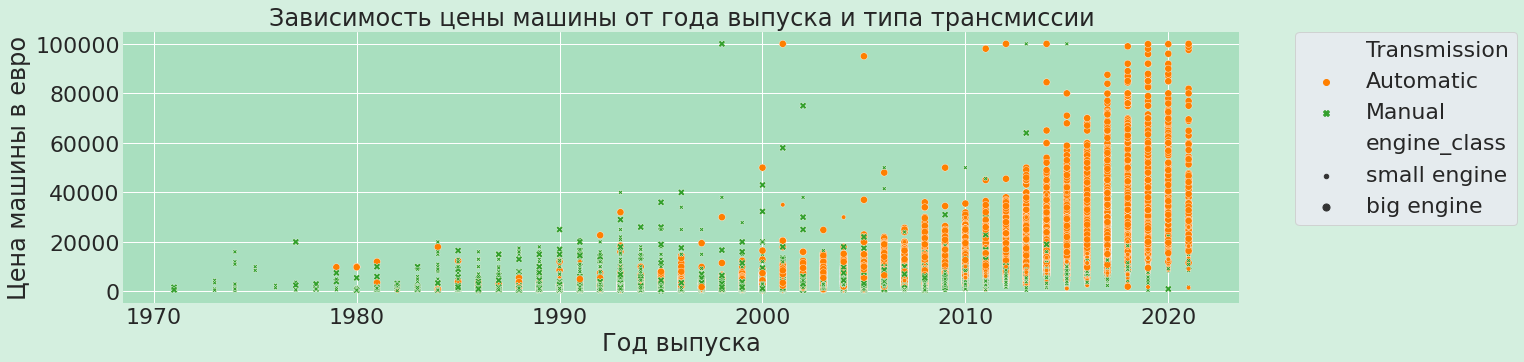

In [ ]:
''' Из данного графика очевидно, что чем новее машина, тем дороже она стоит.
Также очевидно, что машины с автоматической коробкой передач стоят дороже чем с механической, даже при условии,
что обе машины имеют один год выпуска. Объем двигателя также влияет на увеличение цены,
можно заметить, что среди проданных машин с автоматической коробкой явно преоладают машины с большим размером двигателя,
в то время как среди машин с механической коробкой компактные двигатели встречаются гораздо чаще.
'''
configure_plot(20,5)
configure_legend()
sns.set(font_scale=2)

bins = [0,1800,5000]
group_names = ['small engine', 'big engine']
df['engine_class'] = pd.cut(df['Engine_capacity(cm3)'], bins, labels = group_names)

sns.scatterplot(
    data=df,
    x='Year',
    y='Price(euro)',
    hue='Transmission',
    style = 'Transmission',
    size = 'engine_class',
    sizes = (50,20),
    palette='Paired_r'
    )

plt.title('Зависимость цены машины от года выпуска и типа трансмиссии')
plt.xlabel('Год выпуска')
plt.ylabel('Цена машины в евро')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

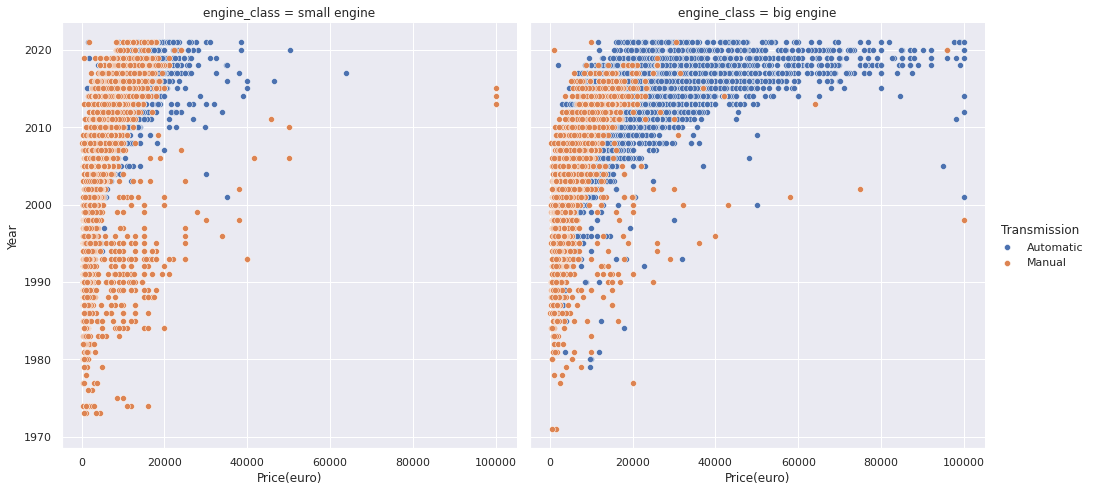

In [ ]:
''' Как видно на верхнем графике некоторые точки разных размеров сливаются друг с другом, поэтому попробуем построить
другой тип графика для анализа тех же взаимосвязей. В нашем случае прекрасно подойдет FacetGrid.
На нем гораздо лучше видно, что мощные двигатели преобладают у машин с автоматической коробкой передач, а также что цены
на машины с мощными двигателями и автоматической коробкой значительно дороже чем цены на машины с механической коробкой и маломощным двигателем.
Интересно также, что в случае с машинами с механической коробкой и маломощным двигателем цена на машину практически не зависит от года выпуска,
основная часть машин этого типа стоит до 20 тысч евро. В случае же с автоматической коробкой и мощнвм двигателем цена на машины, возраст которых
не превышает 10 лет может в несколько раз превышать цену на машину, выпущенную более 10 лет назад.
'''
sns.set(font_scale=1)
g = sns.FacetGrid(df, col="engine_class", hue = "Transmission", height = 7)
g.map_dataframe(sns.scatterplot, x="Price(euro)",y="Year")
g.add_legend()

### Визуализация №3 - Зависимость цены автомобиля от года выпуска и пробега


Text(0.5, 1.0, 'Зависимость цены машины от года выпуска и дистанции пробега')

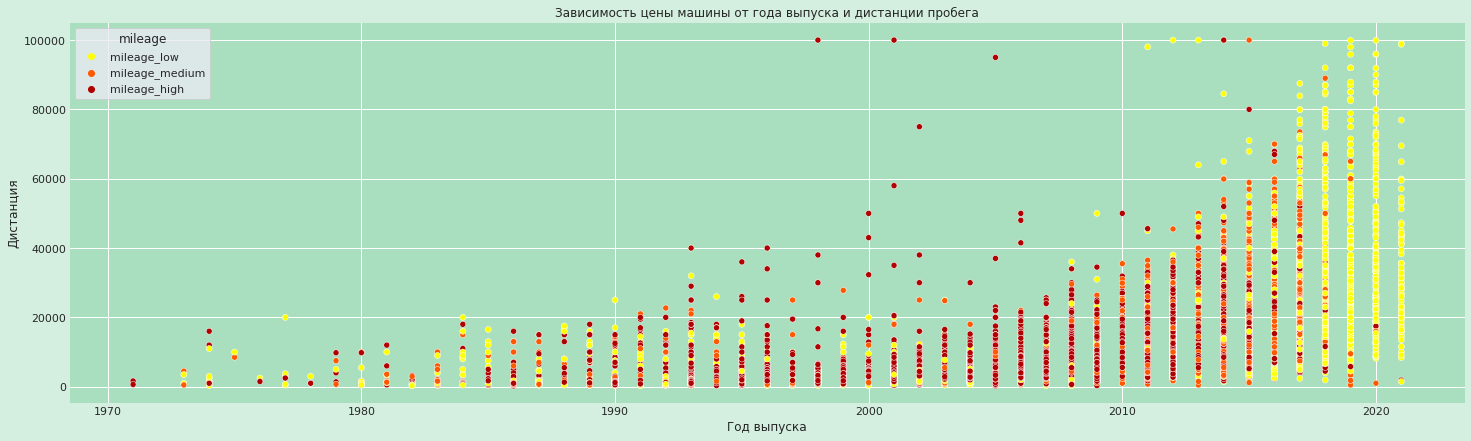

In [ ]:
''' Посмотрим, как влияют год выпуска и дистанция пробега в совокупности на цену автомобиля.
Для этого разобьем для удобства дистанции пробега на 3 диапазона, будем считать пробег от 0 до 75000 км маленьким - low,
пробег от 75000 до 150000 средним - average, а пробег от 150000 км большим - high.
Посмотрим как эти диапазоны будут распределяться в зависимости от года выпуска.
Очевидно, что год выпуска и дистанция пробега сильно связаны обратной корреляцией, поэтому лучше
в дальнейшем их будет объединить в опередленные классы. Например, судя по графику можно выделить следующие классы:
1) пробег низкий до 75000 км и и возраст автомобиля не более 5 лет
2) пробег не более 150000 км и возраст автомобиля не более 10 лет
3) пробег более 150000 км и возраст более 10 лет
'''
df['Distance'] = df['Distance'].astype('int64')
bins_dist = [0, 75000, 150000, 1000000]
group_dist_names = ['mileage_low', 'mileage_medium', 'mileage_high']
df['mileage'] = pd.cut(df['Distance'], bins_dist, labels = group_dist_names)

configure_plot(25,7)
configure_legend()

sns.scatterplot(
    data=df,
    x='Year',
    y='Price(euro)',
    hue='mileage',
    palette='hot_r'
    )

plt.xlabel('Год выпуска')
plt.ylabel('Дистанция')
plt.title(f'Зависимость цены машины от года выпуска и дистанции пробега')


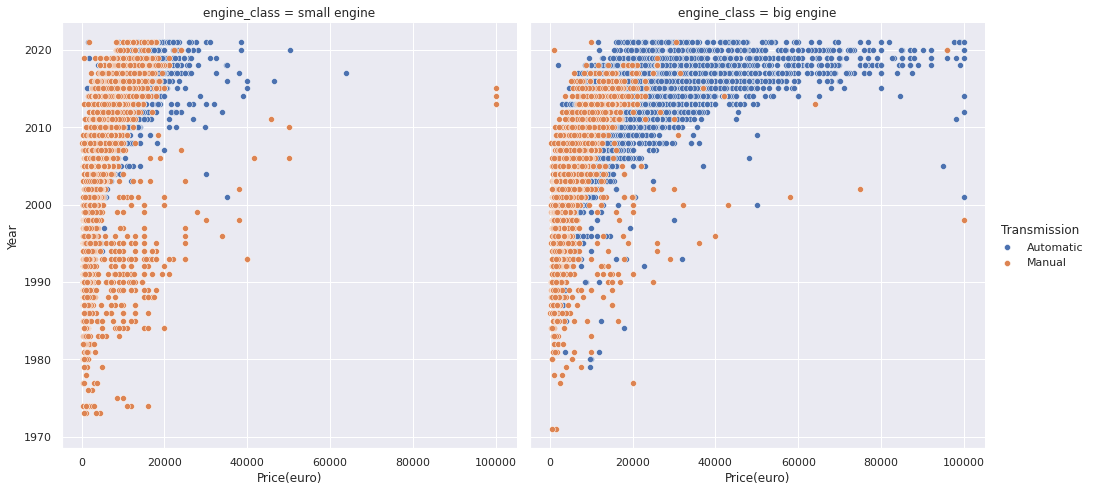

In [ ]:
sns.set(font_scale=1)
g = sns.FacetGrid(df, col="engine_class", hue = "Transmission", height = 7)
g.map_dataframe(sns.scatterplot, x="Price(euro)",y="Year")
g.add_legend()

# 2.  Попытайтесь добавить в модель дополнительные признаки на основе имеющихся:

### Признак №1 - Квантильная категория удельного пробега

In [ ]:
'''Введите квантильные категории для столбца удельный пробег за год (km year).
Чтобы были условно категории «с небольшим пробегом», «со средним пробегом» и «с большим пробегом».
'''
'''Добавим сначала сам столбец "удельный пробег", так как в моем датасете его еще нет.
'''
df['Age'] = 2022 - df.Year
df['km_year'] = round(df.Distance/df.Age)
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)

'''Теперь добавим квантильные категории «с небольшим пробегом», «со средним пробегом» и «с большим пробегом».
'''
qcut_km_year_labels = ['sp_low', 'sp_medium', 'sp_high']
df['qcut_km_year'] = pd.qcut(df['km_year'],3, labels = qcut_km_year_labels)

### Признак №2 - Умная замена редких марок на «редкий дорогой» и «редкий дешевый»

In [ ]:
'''«Умная» замена на редкие категории. В этот раз делайте замену вида «редкий дорогой» и «редкий дешевый»,
чтобы условные УАЗики не попали в одну группу с Jaguar.'''
counts = df.Make.value_counts()
df.loc[(df['Price(euro)'] > 15000) & (df.Make.isin(counts.index[counts<25])), 'Make'] = 'rare expensive'
df.loc[(df['Price(euro)'] <= 15000) & (df.Make.isin(counts.index[counts<25])), 'Make'] = 'rare cheap'

Признак №3 - Категория автомобиля с пробегом по пройденной дистанции и возрасту автомобиля

Text(0.5, 1.0, 'Количество проданных машин по классу пробега')

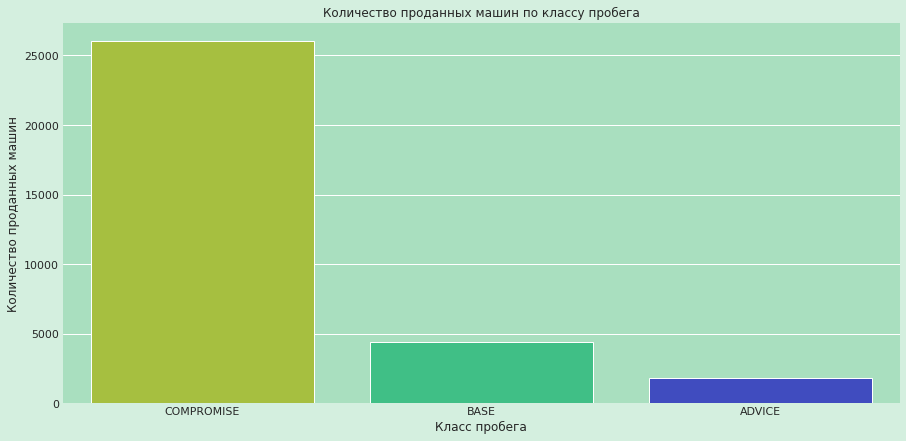

In [ ]:
'''Как я уже заметила выше, можно объединить пробег автомобиля и его возраст в один признак.
Разобьем наши автомобили на три категории в зависимости от пробега и возраста.
1) ADVICE (A) - пробег низкий до 75000 км и и возраст автомобиля не более 5 лет (age <= 5 & mileage == low)
2) BASE (B) - пробег не более 150000 км и возраст автомобиля не более 10 лет (age <= 10 & mileage == average)
3) COMPROMISE (C) - пробег более 150000 км и возраст более 10 лет (age > 10 & mileage == high)
'''
def get_mileage_class(row) -> str:
  if (row['Age'] <= 5 and row['mileage'] == 'mileage_low'):
    return "ADVICE"
  if (row['Age'] <= 10 and row['mileage'] == 'mileage_medium'):
    return "BASE"
  else:
    return "COMPROMISE"

df['mileage_class'] = df.apply(lambda row: get_mileage_class(row), axis = 1)


configure_plot(15,7)
sns.set(font_scale=1)

sns.countplot(
    x='mileage_class',
    data = df,
    palette = "gist_rainbow",
    saturation = 0.5)

plt.xlabel('Класс пробега')
plt.ylabel('Количество проданных машин')
plt.title(f'Количество проданных машин по классу пробега')

Признак №4 - Класс двигателя в зависимости от литража

Text(0.5, 1.0, 'Количество проданных машин по классу двигателя')

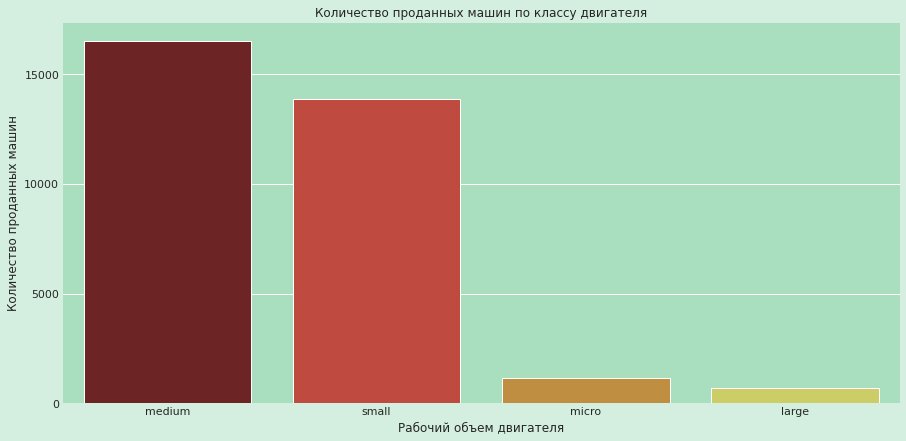

In [ ]:
'''
Хотя я уже выше разделяла двигатели условно на маленькие и большие, но можно расширить и детализировать эту классификацию,
воспользовавшись классификацией, найденной в википедии. Согласно этой классификации двигатели по рабочему обЪему подразделяются на следующие группы:
1) micro => микролитражные (до 1,2 л)
2) small => малолитражные (1,2-1,8л)
3) medium => среднелитражные (1,8-3,5 л)
4) large => крупнолитражные (свыше 3,5 л)
'''

def get_engine_class(capacity) -> str:
  if (capacity < 1200):
    return "micro"
  if (capacity >= 1200 and capacity < 1800):
    return "small"
  if (capacity >= 1800 and capacity < 3500):
    return "medium"
  else:
    return "large"


df['engine_class'] = df.apply(lambda row: get_engine_class(row['Engine_capacity(cm3)']), axis = 1)


configure_plot(15,7)
sns.set(font_scale=1)

sns.countplot(
    x='engine_class',
    data = df,
    palette = "hot",
    saturation = 0.5)

plt.xlabel('Рабочий объем двигателя')
plt.ylabel('Количество проданных машин')
plt.title(f'Количество проданных машин по классу двигателя')

Признак №5 - Ретро автомобиль

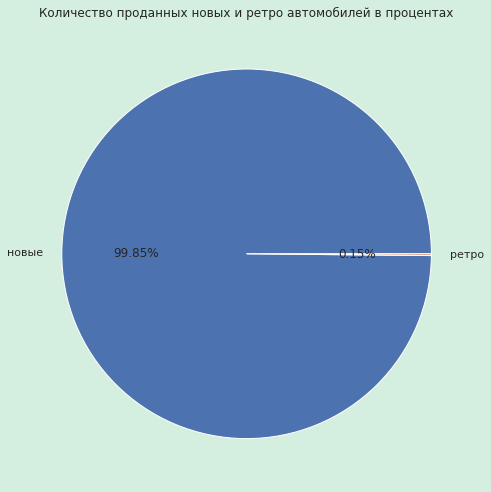

In [ ]:
'''Теоретически по классификации Международной федерации старинных автомобилей (FIVA), все автомобили, выпущенные ранее 1981 года относятся
к старинным, то есть рето автомобилям. Введем бинарный признак, который будет считать наш автомобиль ретро автомобилем, если он выпущен начиная с 1980 года и ранее.
'''
df['is_retro'] = df['Year'] <= 1980
data = df['is_retro'].value_counts()
fig, ax = plt.subplots(figsize=(15,7))
fig.patch.set_facecolor('#d4efdf')
ax.set_facecolor('#a9dfbf')
ax.pie(data, labels = ['новые' if i==0 else 'ретро' for i in data.index ], autopct='%.2f%%')
ax.set_title('Количество проданных новых и ретро автомобилей в процентах')
plt.tight_layout()

Признаки №6 и №7 - Японский автомобиль и немецкий автомобиль

In [ ]:
''' Известно, что японские и немецкие подержаные автомобили пользуются самым большим спросом, за свою "неубиваемость",
соответственно и цены на автомобили этих стран-производителей скорей всего будут чуть выше. В любом случае интересно проверить
оказывает ли страна-производитель какое то дополнительное влияние на ценообразование. ВВедем отдельные бинарные признаки для японских
и немецких автомобилей.
Из построенных графиков очевидно, что факт, что машина является немецкой существенно повышает ее цену,
в случае с японцами тут нет ярко выраженной зависимости - есть как машины выше средней рыночной цены так и наоборот дешевле.
'''
japan_manufacturers = ['Toyota', 'Nissan', 'Hyundai','Lexus', 'Mazda', 'Infiniti',
                       'Mitsubishi', 'Suzuki', 'Subaru', 'Daihatsu', 'Honda', 'Isuzu']

german_manufacturers = ['Opel', 'Mercedes', 'Volkswagen', 'BMW','Audi', 'Porsche']

df['is_japan'] = df.Make.isin(japan_manufacturers)
df['is_german'] = df.Make.isin(german_manufacturers)

configure_plot(25,10)
configure_legend()

sns.scatterplot(
    data=df,
    x='Distance',
    y='Price(euro)',
    hue='is_german',
    palette='hot_r'
    )
plt.show()


configure_plot(25,10)
configure_legend()
sns.scatterplot(
    data=df,
    x='Distance',
    y='Price(euro)',
    hue='is_japan',
    palette='hot_r'
    )
plt.show()


2.3025750930440454
-0.0
2.3025850929940455


Признак №8 - Пассажирский или грузопассажирский автомобиль

Text(0.5, 1.0, 'Кол-во проданных машин по признаку грузопассажирский/пассажирский')

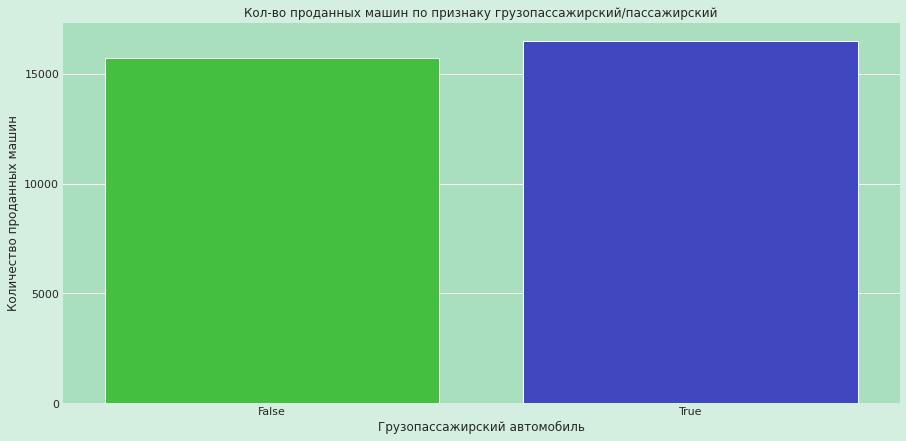

In [ ]:
'''Можно разделить наши автомобили по типу кузова на грузопассажирские и пассажирские.
К грузопассажирским типам отнесем типы Universal, Suv, Crossover, Combi, Microvan, Minivan, Pickup.
К пассажирским - Cabriolet, Roadster, Coupe, Hatchback, Sedan.
Признак сделаем бинарным и будем записывать 1, если автомобиль является грузопассажирским.
'''
df.Style.unique()
cargo_passenger_types = ['Universal', 'Microvan', 'SUV', 'Crossover', 'Minivan', 'Pickup', 'Combi']
df['is_cargo_passenger'] = df.Style.isin(cargo_passenger_types)

configure_plot(15,7)
sns.set(font_scale=1)

sns.countplot(
    x='is_cargo_passenger',
    data = df,
    palette = "hsv",
    saturation = 0.5)

plt.xlabel('Грузопассажирский автомобиль')
plt.ylabel('Количество проданных машин')
plt.title(f'Кол-во проданных машин по признаку грузопассажирский/пассажирский')

Признак №9 - Городской автомобиль или автомобиль повышенной проходимости

Text(0.5, 1.0, 'Кол-во проданных машин по признаку внедорожник/городской')

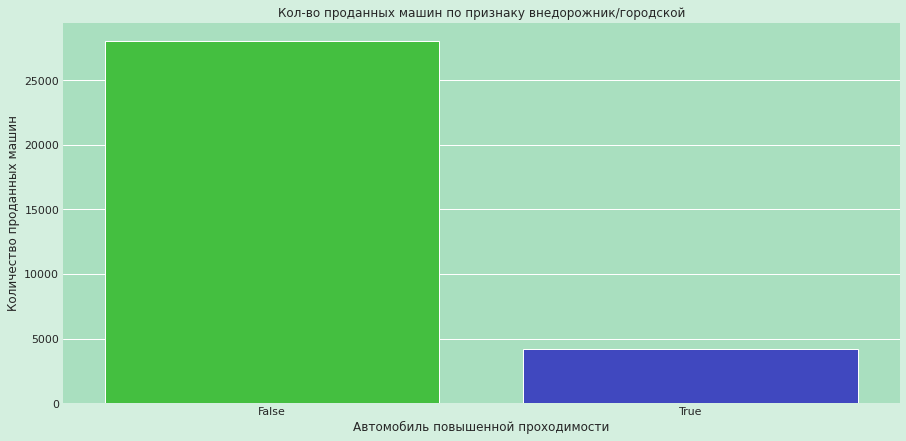

In [ ]:
''' Разделим также автомобили по признаку явялется ли автомобиль автомобилем повышенной проходимости.
К таким автомобилям можно отнести автомобили с типом кузова Crossover, SUV, Pickup'''
off_road_types = ['Suv', 'Pickup', 'Crossover']
df['is_off_road'] = df.Style.isin(off_road_types)
configure_plot(15,7)
sns.set(font_scale=1)

sns.countplot(
    x='is_off_road',
    data = df,
    palette = "hsv",
    saturation = 0.5)

plt.xlabel('Автомобиль повышенной проходимости')
plt.ylabel('Количество проданных машин')
plt.title(f'Кол-во проданных машин по признаку внедорожник/городской')

Признак №10 - Многофункциональный автомобиль (Multi-purpose vehicle)

Text(0.5, 1.0, 'Кол-во проданных машин по признаку многофункциональный автомобиль')

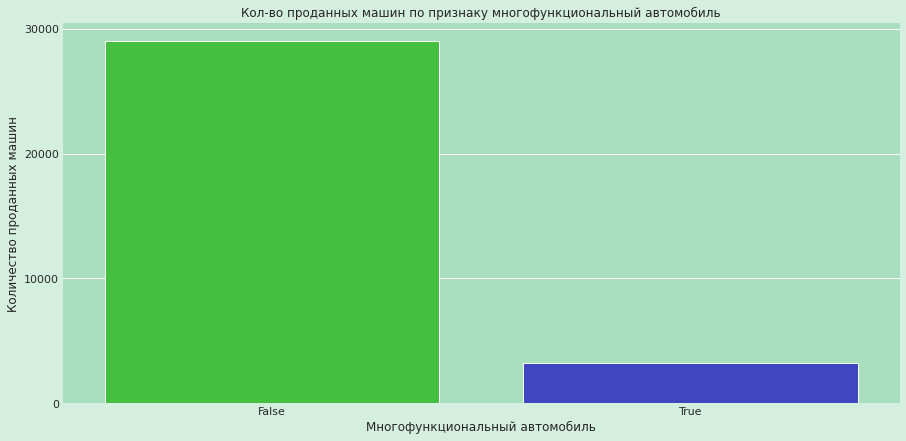

In [ ]:
''' Выделим еще один бинарный признак - мультифункциональный автомобиль.
К таким автомобилям можно отнести автомобили с типом кузова Microvan, Minivan, Pickup'''

mvp_types = ['Microvan', 'Minivan', 'Pickup']
df['is_mpv'] = df.Style.isin(mvp_types)

configure_plot(15,7)
sns.set(font_scale=1)

sns.countplot(
    x='is_mpv',
    data = df,
    palette = "hsv",
    saturation = 0.5)

plt.xlabel('Многофункциональный автомобиль')
plt.ylabel('Количество проданных машин')
plt.title(f'Кол-во проданных машин по признаку многофункциональный автомобиль')

Признак №11 - Автомобиль с открытым верхом

Text(0.5, 1.0, 'Кол-во проданных машин по признаку автомобиль с открытм верхом')

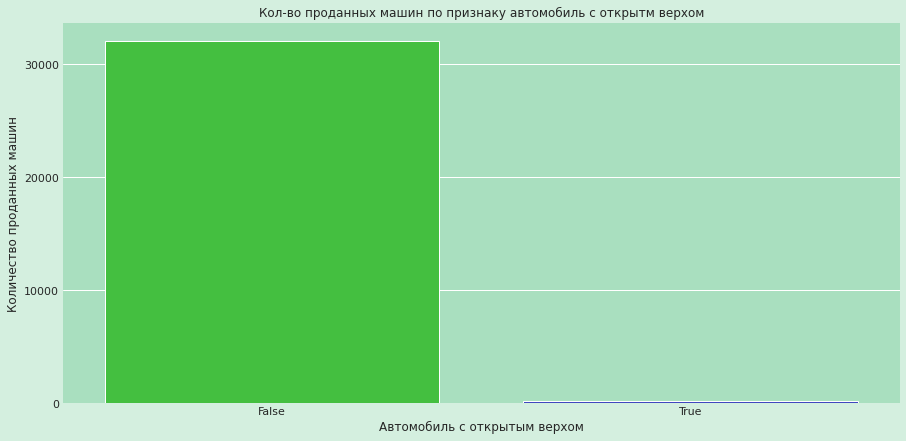

In [ ]:
''' Напоследок выделим в отдельный признак также принадлежность автомобиля к классу автомобилей с открытм верхом.
Из перечисленных типов к таким автомобилям тностся типы Cabriolet и Roadster.
'''
cabrio_types = ['Cabriolet', 'Roadster']
df['is_open_top'] = df.Style.isin(cabrio_types)

configure_plot(15,7)
sns.set(font_scale=1)

sns.countplot(
    x='is_open_top',
    data = df,
    palette = "hsv",
    saturation = 0.5)

plt.xlabel('Автомобиль с открытым верхом')
plt.ylabel('Количество проданных машин')
plt.title(f'Кол-во проданных машин по признаку автомобиль с открытм верхом')

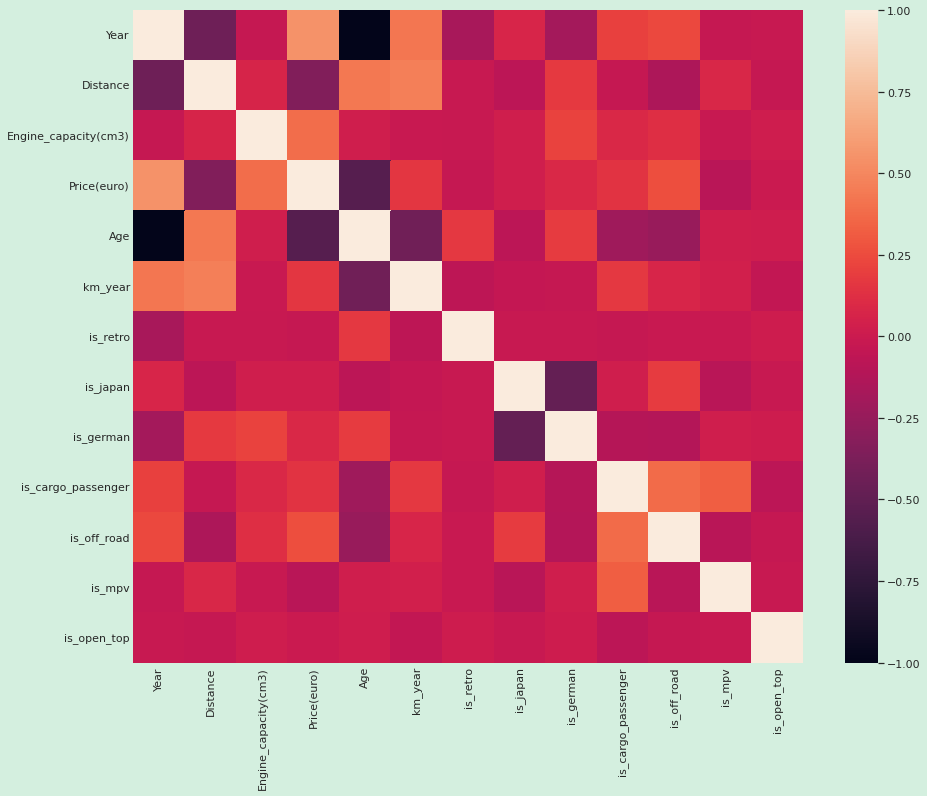

In [ ]:
'''Посмотрим на корреляцию наших числовых. признаков - видим сильную отрицательную корреляцию между годом выпуска и возрастом,
поэтому какой то из этих признаков придется убрать, а в остальном все неплохо.'
'''
configure_plot(15,12)
sns.heatmap(df.corr())

In [ ]:
df.to_csv('/content/cars_moldova_with_new_features.csv',index=False)

# 3.  Выполните предварительную обработку данных.

### Нормализация

In [ ]:
df_norm  = df.copy()
num_columns = get_numerical_features()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()
df_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

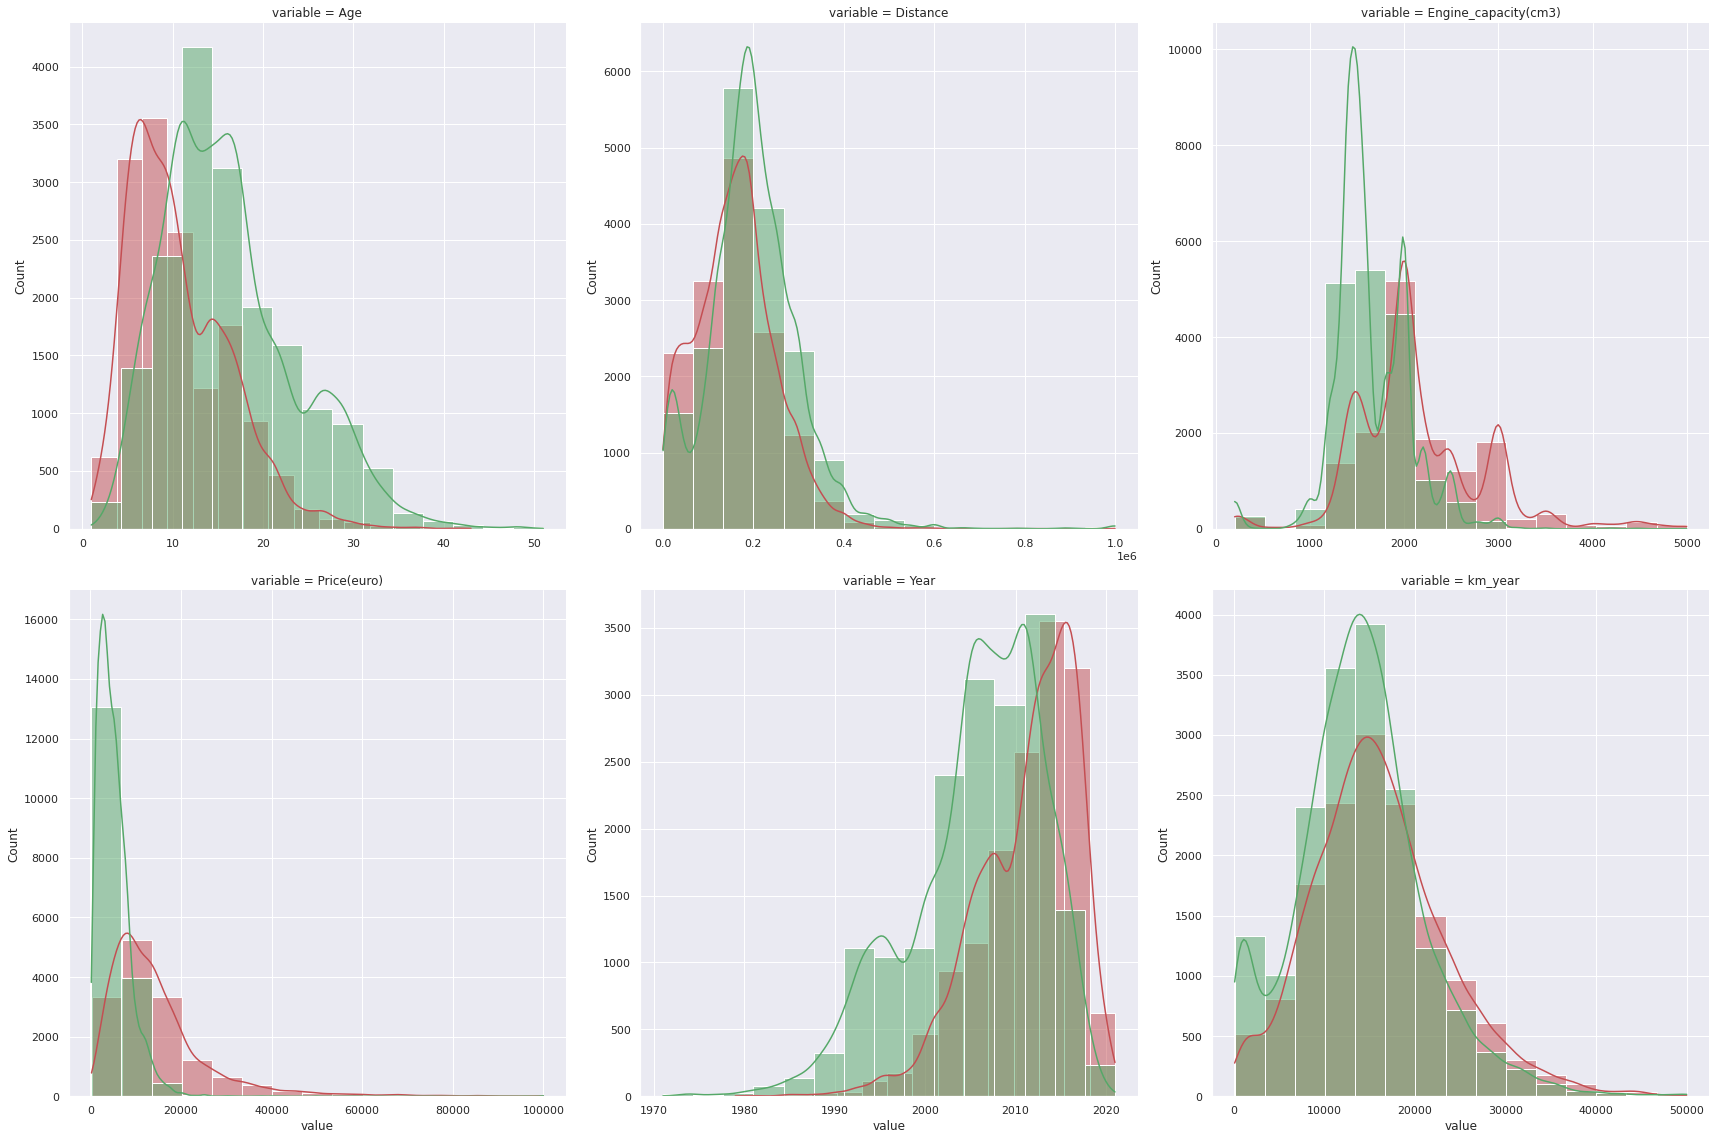

In [ ]:
''' Построим графики распределения для наших числовых признаков до нормализации'''
num_f=get_numerical_features()
sns.set(font_scale=1)
d = {'color': ['r', 'g']}
features = pd.melt(df, value_vars= sorted(num_f), id_vars = 'Transmission')
grid = sns.FacetGrid(features, col='variable', height=8, col_wrap=3, sharex=False, sharey=False, hue_kws=d, hue = 'Transmission')
grid = grid.map(sns.histplot,'value', kde=True, bins = 15)

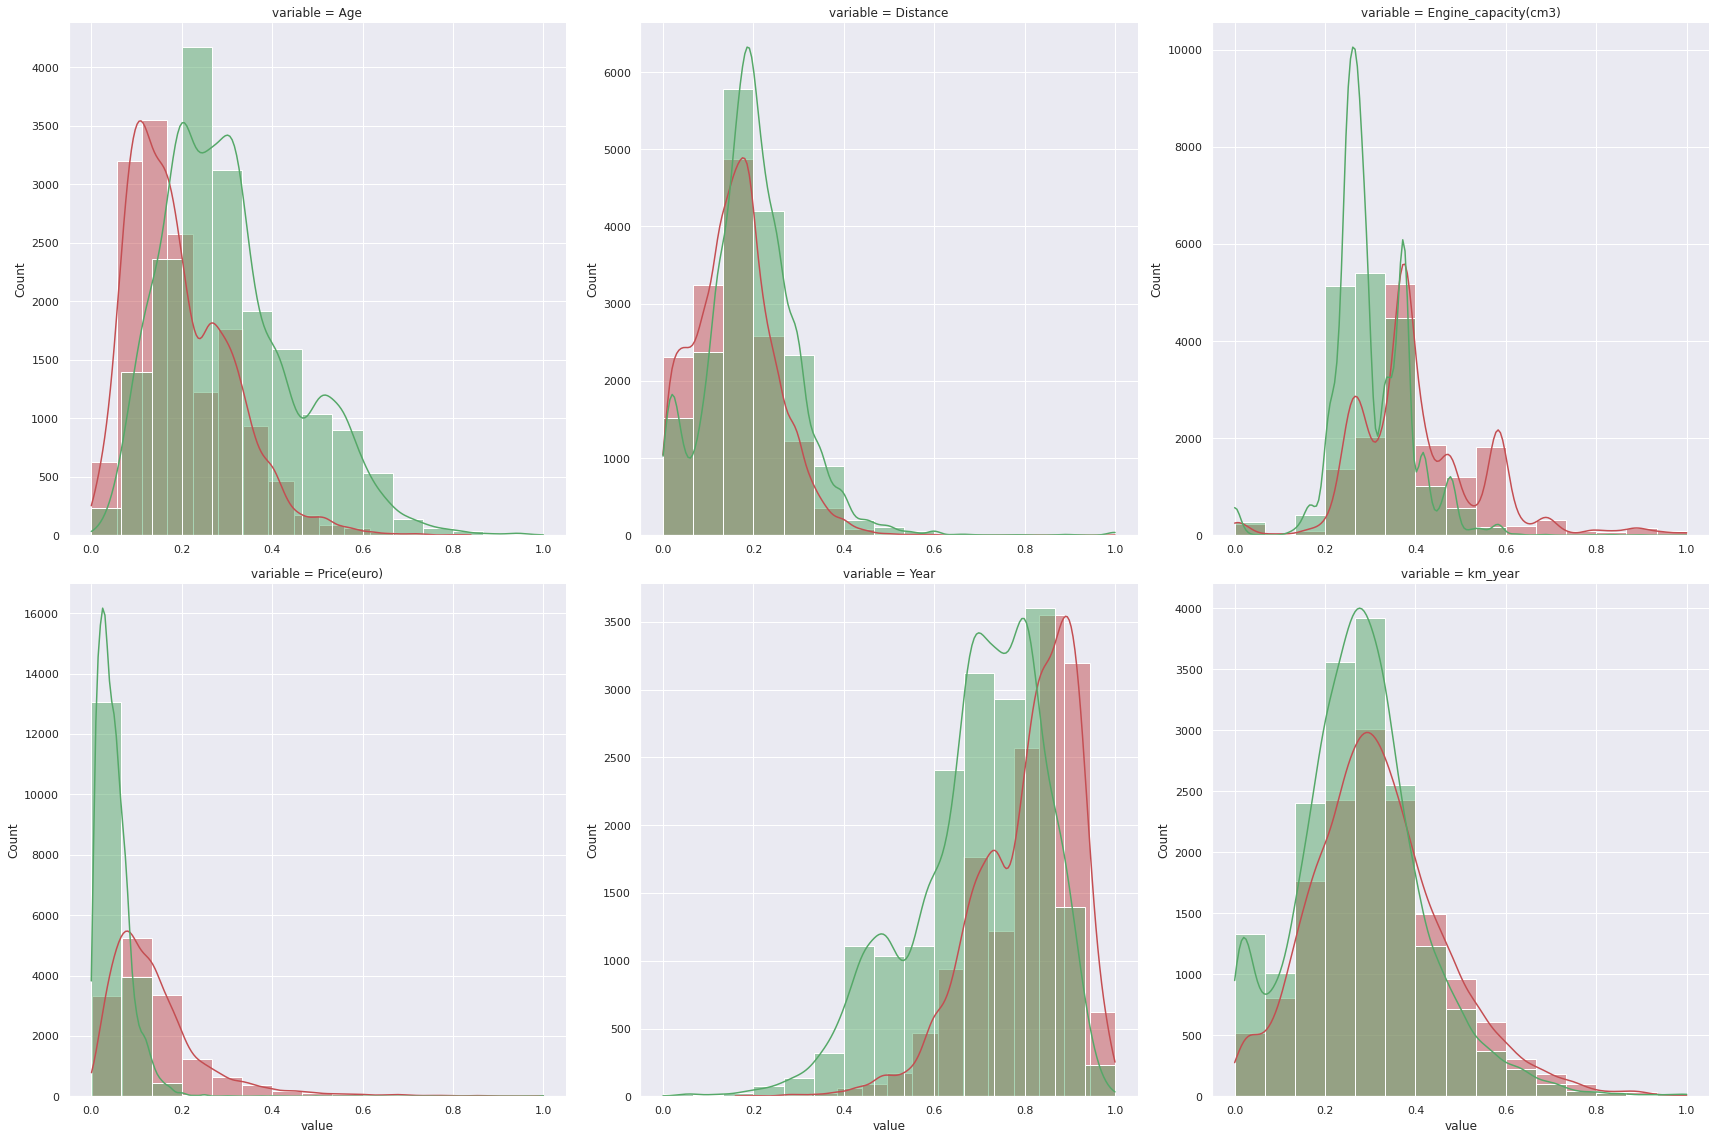

In [ ]:
'''Теперь посмотрим на тот же графики, но уже после выполнения операции нормализации.
так как нормализация является линейной операцией на графики распределения она не влияет,
а меняет лишь их масштаб. Нормализация масштабирует набор данных таким образом,
чтобы каждое значение находилось в диапазоне от 0 до 1. '''
features = pd.melt(df_norm, value_vars= sorted(num_f), id_vars = 'Transmission')
grid = sns.FacetGrid(features, col='variable', height=8, col_wrap=3, sharex=False, sharey=False, hue_kws=d, hue = 'Transmission')
grid = grid.map(sns.histplot,'value', kde=True, bins = 15)

### Стандартизация

In [ ]:
df_scaled = df.copy()
mean = df[num_columns].mean()
std = df[num_columns].std()
df_scaled[num_columns] = (df[num_columns]-mean)/std

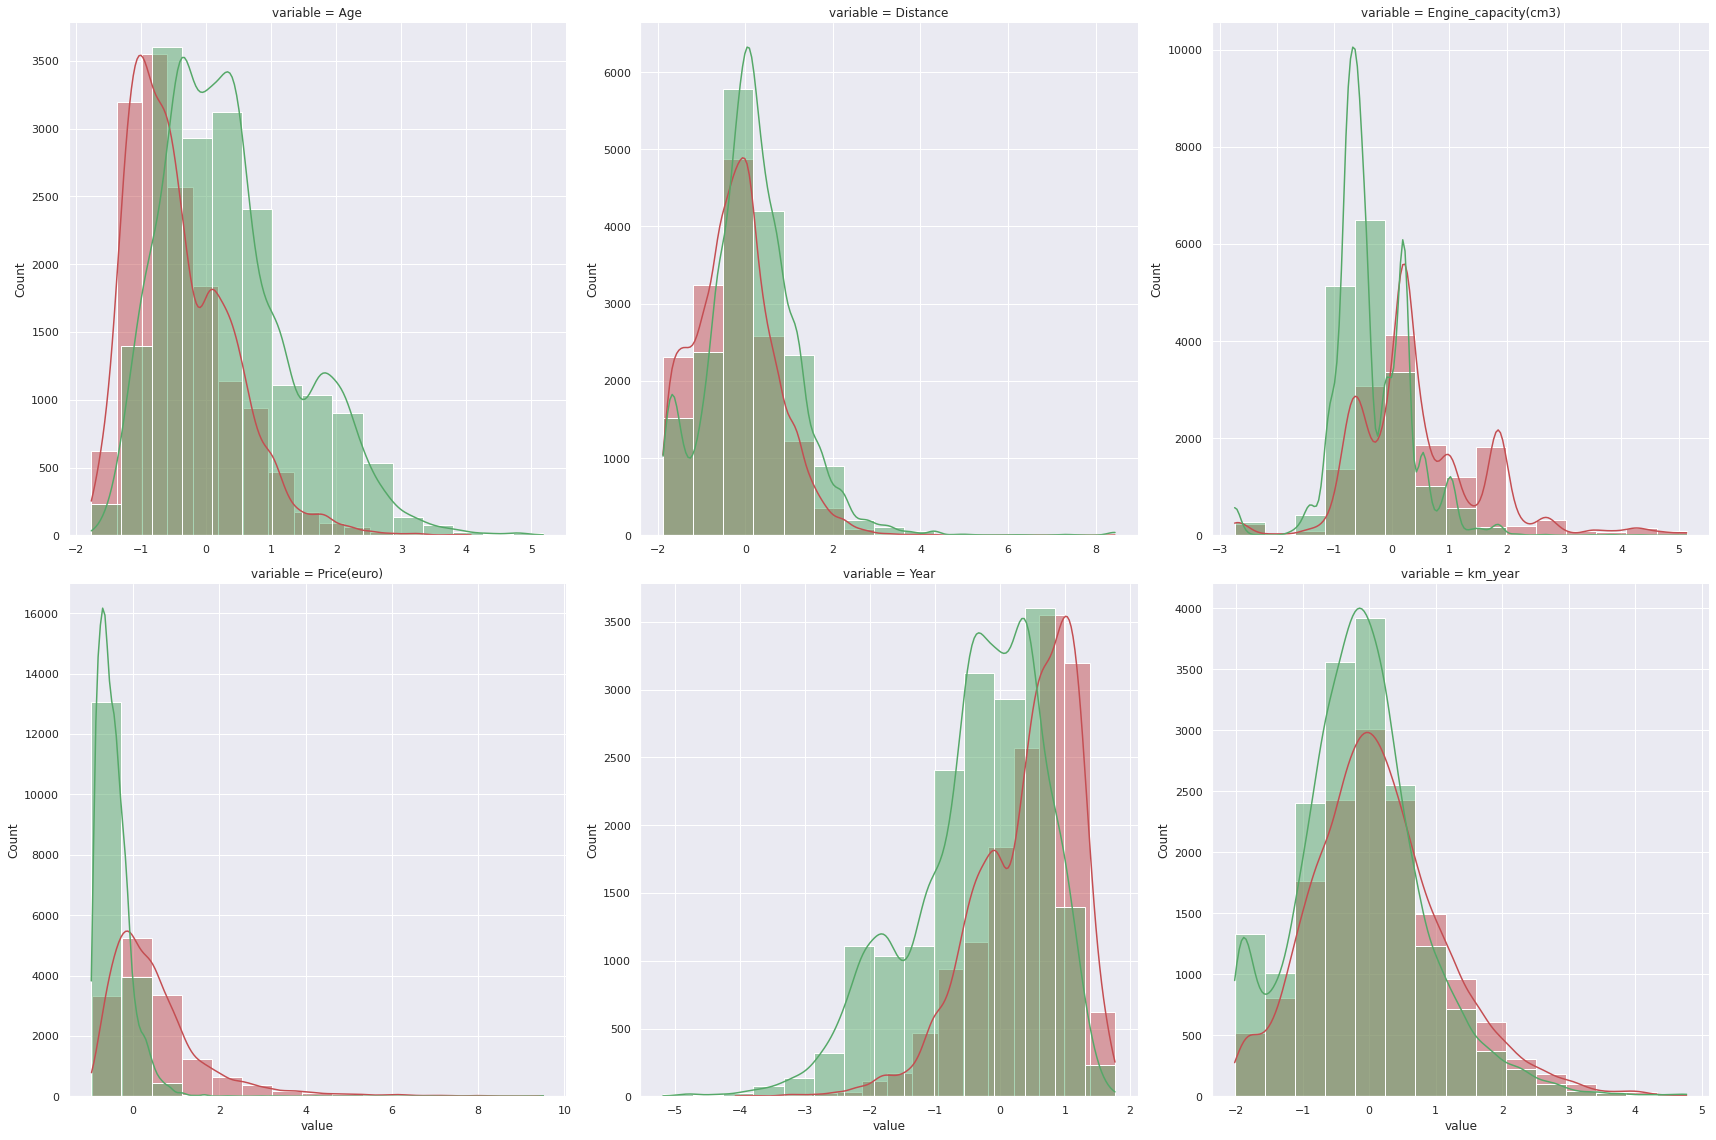

In [ ]:
'''Также как и нормализация, стандартизация является линейной операцией
и на графики распределения она не влияет, а меняет лишь их масштаб.
Стандартизация изменяет масштаб набора данных, чтобы иметь среднее значение 0
и стандартное отклонение 1.'''
features = pd.melt(df_scaled, value_vars= sorted(num_f), id_vars = 'Transmission')
grid = sns.FacetGrid(features, col='variable', height=8, col_wrap=3, sharex=False, sharey=False, hue_kws=d, hue = 'Transmission')
grid = grid.map(sns.histplot,'value', kde=True, bins = 15)

### Степенное преобразование

Сначала логарифмирование, потом стандартизация

In [ ]:
df_power  = df.copy()
df_power[num_columns] = np.log(df_power[num_columns])
mean = df_power[num_columns].mean()
std = df_power[num_columns].std()
df_power[num_columns] = (df_power[num_columns]-mean)/std

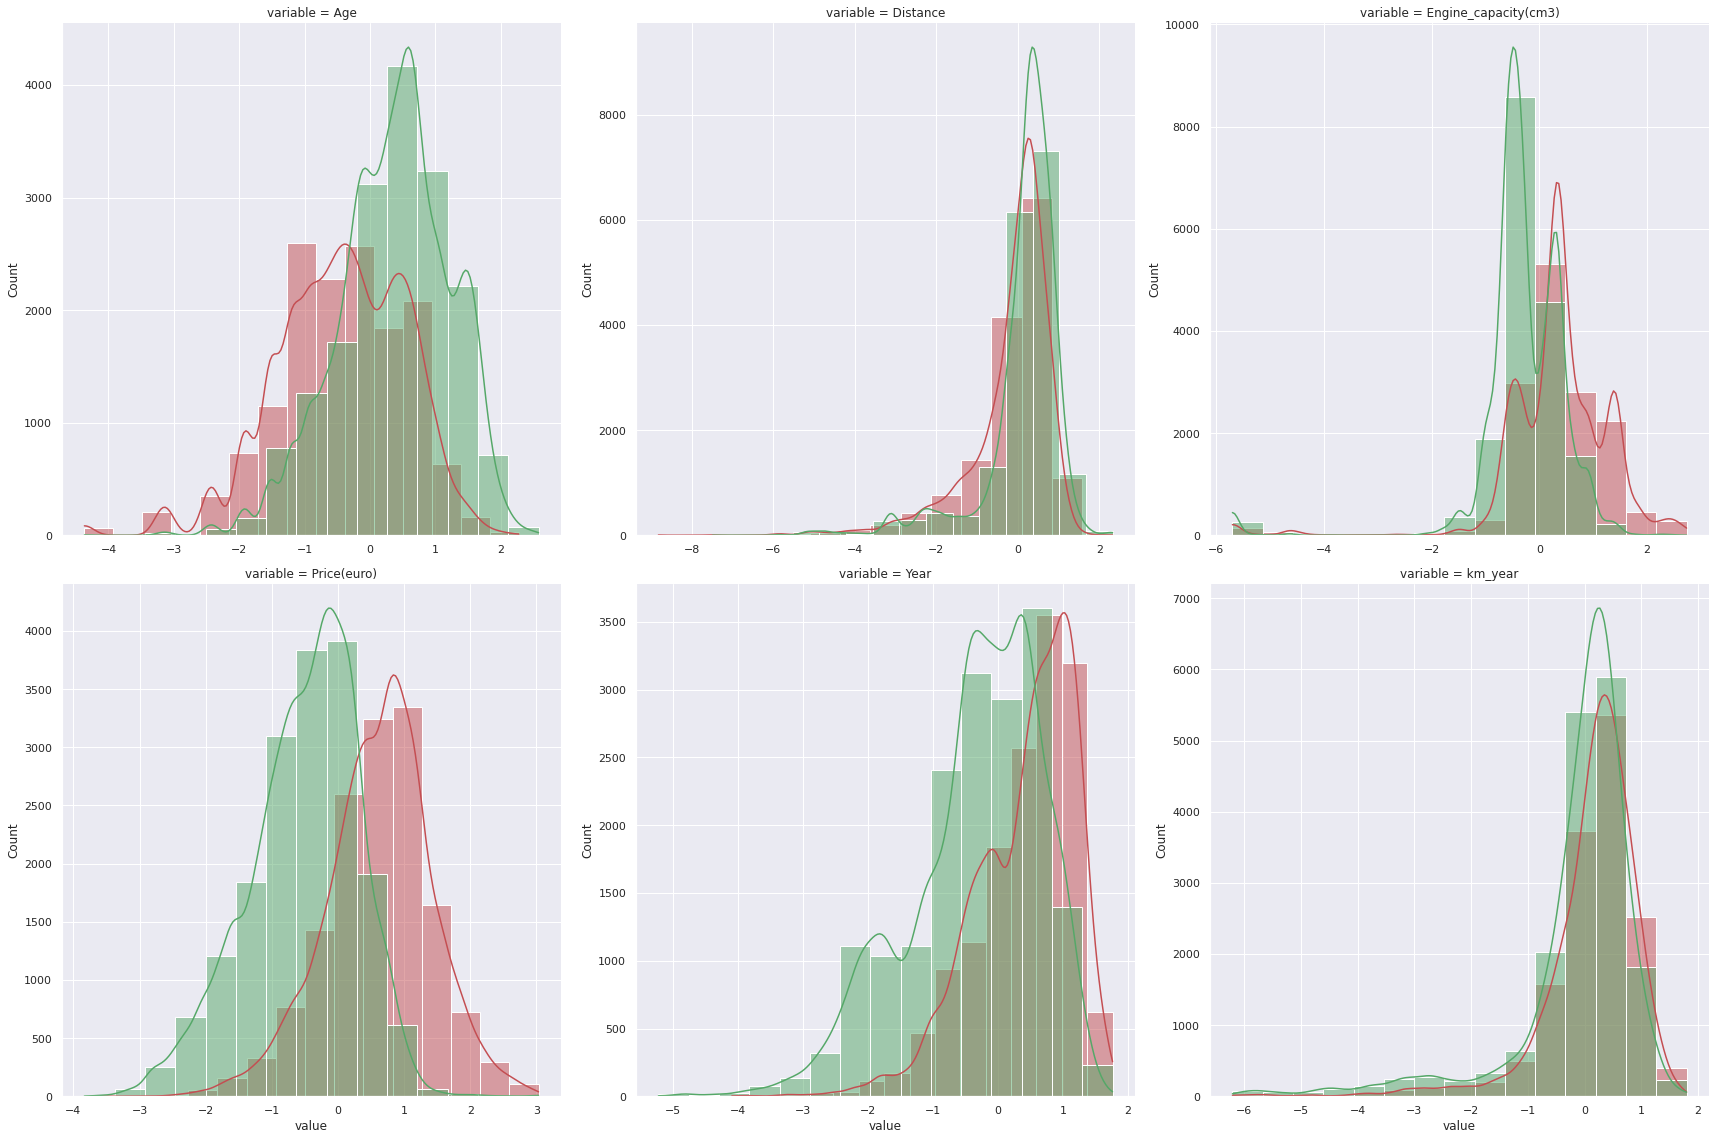

In [ ]:
''' Степенное преобразование является нелинейным преобразованием и поэтому
оно меняет вид распределения. Как видим, графики наших численных признаков
после степенного преобразования приблизились к нормальному распределению.'''
features = pd.melt(df_power, value_vars= sorted(num_f), id_vars = 'Transmission')
grid = sns.FacetGrid(features, col='variable', height=8, col_wrap=3, sharex=False, sharey=False, hue_kws=d, hue = 'Transmission')
grid = grid.map(sns.histplot,'value', kde=True, bins = 15)

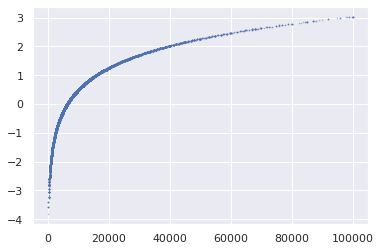

In [ ]:
plt.plot(df['Price(euro)'], df_power['Price(euro)'], '.', alpha = 0.5, markersize = 1)

### Сохранение DataFrame в файл


In [ ]:
df_norm.to_csv('/content/cars_moldova_norm.csv',index=False)
df_scaled.to_csv('/content/cars_moldova_scaled.csv',index=False)
df_power.to_csv('/content/cars_moldova_power.csv',index=False)

### Приведение категориальных признаков к численным

### Бинарные признаки

In [ ]:
df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})

def get_bool_columns():
  return list(df.select_dtypes(include=bool).columns)

for _, column_name in enumerate(get_bool_columns()):
  df[column_name] = df[column_name].astype('int8')

### Ordinal кодирование многозначных признаков

In [ ]:
df_se = df.copy()
df_se = df_se.drop(columns=['Model'])
cat_columns = get_categorical_features(df_se)
df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes

df_se.info()

In [ ]:
df_se.head()

,Make,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),engine_class,mileage,...,km_year,qcut_km_year,mileage_class,is_retro,is_japan,is_german,is_cargo_passenger,is_off_road,is_mpv,is_open_top
0,39,2011,4,195000,1800.0,2,NaN,7750.0,1,2,...,17727.0,2,2,0,1,0,0,0,0,0
1,31,2014,11,135000,1500.0,0,NaN,8550.0,3,1,...,16875.0,1,1,0,0,0,1,0,0,0
2,31,2012,11,110000,1500.0,0,NaN,6550.0,3,1,...,11000.0,0,1,0,0,0,1,0,0,0
3,28,2006,11,200000,1600.0,3,NaN,4100.0,3,2,...,12500.0,1,2,0,0,1,1,0,0,0
4,23,2000,5,300000,2200.0,0,NaN,3490.0,1,2,...,13636.0,1,2,0,0,1,1,0,1,0


In [ ]:
#sns.pairplot(data = df_se, hue ='Transmission');

### One-hot кодирование многозначных признаков

In [ ]:
df_one = df.copy()
df_one = df_one.drop(columns = ['Model'])
df_one = pd.get_dummies(df_one)
df_one.tail()

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Age,km_year,is_retro,is_japan,is_german,...,engine_class_small,mileage_mileage_low,mileage_mileage_medium,mileage_mileage_high,qcut_km_year_sp_low,qcut_km_year_sp_medium,qcut_km_year_sp_high,mileage_class_ADVICE,mileage_class_BASE,mileage_class_COMPROMISE
32215,2016,88000,1800.0,NaN,11500.0,6,14667.0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
32216,2002,225000,1800.0,NaN,4400.0,20,11250.0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
32217,2015,89000,1500.0,NaN,7000.0,7,12714.0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
32218,2006,370000,2000.0,NaN,4000.0,16,23125.0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
32219,2006,300000,1500.0,NaN,4000.0,16,18750.0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [ ]:
df_one.info()

### Сохранение DataFrame в файл


In [ ]:
df_se.to_csv('/content/cars_moldova_cat_num.csv',index=False)
df_one.to_csv('/content/cars_moldova_onehot.csv',index=False)